In [4]:
%pip install "numpy<2" --force-reinstall


  Using cached numpy-1.26.4-cp312-cp312-macosx_11_0_arm64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-macosx_11_0_arm64.whl (13.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.0
    Uninstalling numpy-2.3.0:
      Successfully uninstalled numpy-2.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
devito 4.8.19 requires numpy<2.3.1,>=2, but you have numpy 1.26.4 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


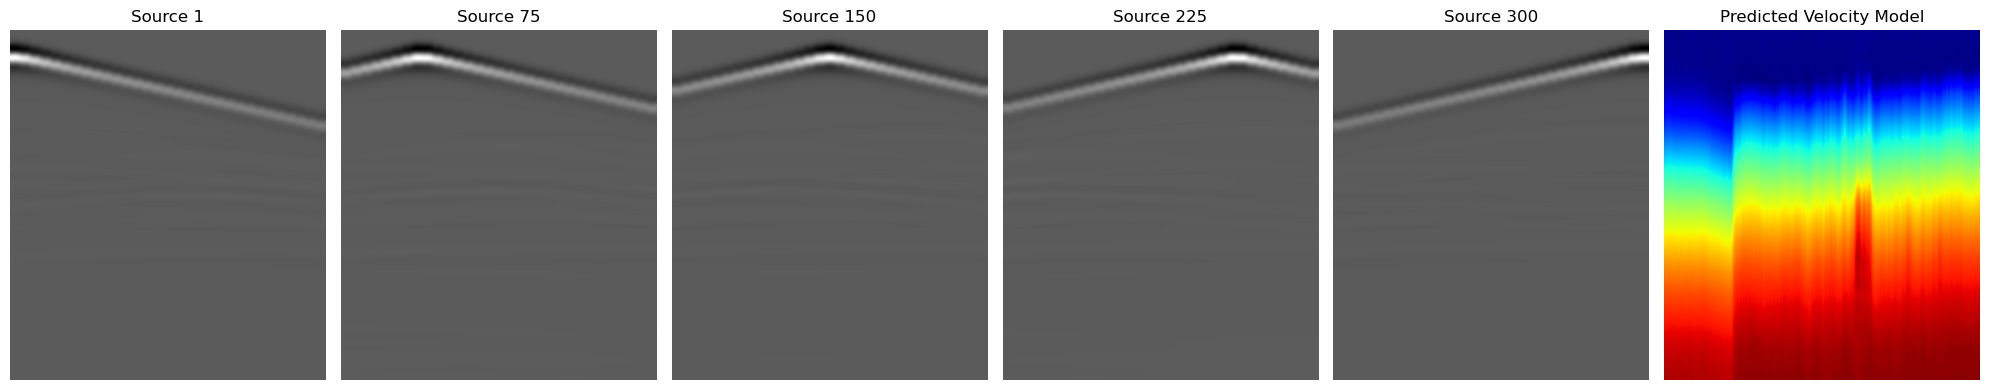

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

test_data = '../data/speed-and-structure-test-data/*'
test_paths = glob(test_data)
test_ids = [path.split("/")[-1] for path in test_paths]

# Pick one test sample
test_sample_path = test_paths[0]  # Assuming test_paths = glob("../data/speed-and-structure-test-data/*")
source_coordinates = [1, 75, 150, 225, 300]

# Load UNet prediction for this test sample
sample_id = os.path.basename(test_sample_path)
unet_prediction = np.load("submission_res_attn_unet.npz")[sample_id]

# Create a 1x6 subplot: 5 for receiver data, 1 for predicted velocity model
f, ax = plt.subplots(1, 6, figsize=(20, 4))

# Plot receiver data for each source
for i, s in enumerate(source_coordinates):
    rec_data = np.load(os.path.join(test_sample_path, f"receiver_data_src_{s}.npy"))
    ax[i].imshow(rec_data, cmap="gray", aspect="auto")
    ax[i].set_title(f"Source {s}")
    ax[i].axis("off")

# Plot the predicted velocity model (transpose for correct orientation)
ax[5].imshow(unet_prediction.T, cmap="jet", aspect="auto")
ax[5].set_title("Predicted Velocity Model")
ax[5].axis("off")

plt.tight_layout()
plt.show()
